In [88]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from scipy import linalg
from matplotlib import pyplot as plt

# 1.读取训练数据集train_data和测试数据集test_data

In [180]:
train_data = pd.read_csv("../data/house-prices-advanced-regression-techniques/train.csv")
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [181]:
test_data = pd.read_csv("../data/house-prices-advanced-regression-techniques/test.csv")
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal



# 2. 数据预处理

In [182]:
# all_features包含所有训练集和测试集的特征值 （从train_data中去掉最后的Label， SalePrice ）
all_features = pd.concat((train_data.iloc[:, 1:-1], test_data.iloc[:, 1:]))
all_features.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [183]:
all_features.shape

(2919, 79)

In [184]:
# 挑出所有是数值类型的columns
all_features.dtypes[all_features.dtypes != object]

MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1       float64
BsmtFinSF2       float64
BsmtUnfSF        float64
TotalBsmtSF      float64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath     float64
BsmtHalfBath     float64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars       float64
GarageArea       float64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
dtype: object

In [185]:
numeric_features = all_features.dtypes[all_features.dtypes != 'object'].index
numeric_features

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [186]:
all_features[numeric_features].head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,548.0,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,460.0,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,608.0,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,642.0,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,836.0,192,84,0,0,0,0,0,12,2008


In [187]:
# 对连续数值的特征做标准化
all_features[numeric_features] = all_features[numeric_features].apply(
    lambda x: (x - x.mean()) / (x.std()))

In [188]:
all_features[numeric_features].head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0.067320,-0.184443,-0.217841,0.646073,-0.507197,1.046078,0.896679,0.523038,0.580708,-0.29303,...,0.348780,-0.740634,0.199972,-0.359539,-0.103313,-0.285886,-0.063139,-0.089577,-1.551918,0.157619
1,-0.873466,0.458096,-0.072032,-0.063174,2.187904,0.154737,-0.395536,-0.569893,1.177709,-0.29303,...,-0.059772,1.614603,-0.702722,-0.359539,-0.103313,-0.285886,-0.063139,-0.089577,-0.446848,-0.602858
2,0.067320,-0.055935,0.137173,0.646073,-0.507197,0.980053,0.848819,0.333448,0.097840,-0.29303,...,0.627338,-0.740634,-0.081195,-0.359539,-0.103313,-0.285886,-0.063139,-0.089577,1.026577,0.157619
3,0.302516,-0.398622,-0.078371,0.646073,-0.507197,-1.859033,-0.682695,-0.569893,-0.494771,-0.29303,...,0.785188,-0.740634,-0.184783,3.874303,-0.103313,-0.285886,-0.063139,-0.089577,-1.551918,-1.363335
4,0.067320,0.629439,0.518814,1.355319,-0.507197,0.947040,0.753100,1.381770,0.468770,-0.29303,...,1.685860,0.776834,0.540332,-0.359539,-0.103313,-0.285886,-0.063139,-0.089577,2.131647,0.157619


In [189]:
category_features = all_features.dtypes[all_features.dtypes == 'object'].index
category_features

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [190]:
all_features[category_features].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [191]:
# map category features using numbers
# example:
# MSZoning: Identifies the general zoning classification of the sale.
#
#        A	Agriculture
#        C	Commercial
#        FV	Floating Village Residential
#        I	Industrial
#        RH	Residential High Density
#        RL	Residential Low Density
#        RP	Residential Low Density Park
#        RM	Residential Medium Density
# map as:
# A -> 0
# C -> 1
# FV -> 2
# I -> 3
# RH -> 4
# ...
# nan -> -1
for feature in category_features:
    categories = set(all_features[feature])
    category_map = {}
    category_map[np.nan] = -1;
    value = 0
    for category in categories:
        if(type(category) is not str):
            continue
        category_map[category] = value
        value = value + 1
    all_features[feature] = all_features[feature].map(category_map).replace(np.nan, -1)
    all_features[feature] = all_features[feature].astype('int64')
all_features[category_features].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,0,0,-1,1,3,1,4,2,5,4,...,3,1,0,0,2,-1,-1,-1,7,0
1,0,0,-1,1,3,1,2,2,23,6,...,3,1,0,0,2,-1,-1,-1,7,0
2,0,0,-1,2,3,1,4,2,5,4,...,3,1,0,0,2,-1,-1,-1,7,0
3,0,0,-1,2,3,1,0,2,4,4,...,2,0,0,0,2,-1,-1,-1,7,5
4,0,0,-1,2,3,1,2,2,20,4,...,3,1,0,0,2,-1,-1,-1,7,0


In [192]:
all_features[category_features].dtypes

MSZoning         int64
Street           int64
Alley            int64
LotShape         int64
LandContour      int64
Utilities        int64
LotConfig        int64
LandSlope        int64
Neighborhood     int64
Condition1       int64
Condition2       int64
BldgType         int64
HouseStyle       int64
RoofStyle        int64
RoofMatl         int64
Exterior1st      int64
Exterior2nd      int64
MasVnrType       int64
ExterQual        int64
ExterCond        int64
Foundation       int64
BsmtQual         int64
BsmtCond         int64
BsmtExposure     int64
BsmtFinType1     int64
BsmtFinType2     int64
Heating          int64
HeatingQC        int64
CentralAir       int64
Electrical       int64
KitchenQual      int64
Functional       int64
FireplaceQu      int64
GarageType       int64
GarageFinish     int64
GarageQual       int64
GarageCond       int64
PavedDrive       int64
PoolQC           int64
Fence            int64
MiscFeature      int64
SaleType         int64
SaleCondition    int64
dtype: obje

# 3. 数据分析

# 3.1 再次预处理category类型的数据，当做int64做数值归一化，为主成分分析做准备

In [193]:
# 对train_features里面的category features也做归一化处理
svd_all_features = all_features
svd_all_features[category_features] = svd_all_features[category_features].apply(
    lambda x: (x - x.mean()) / (x.std()))
svd_all_features[category_features].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,-0.415599,-0.064238,-0.253517,-0.598778,0.307869,0.030858,0.588455,0.22198,-0.770661,-0.010601,...,0.334543,0.316497,-0.139159,-0.084655,0.305423,-0.055488,-0.445353,-0.175937,0.363372,-0.414476
1,-0.415599,-0.064238,-0.253517,-0.598778,0.307869,0.030858,-0.658061,0.22198,1.873806,1.864797,...,0.334543,0.316497,-0.139159,-0.084655,0.305423,-0.055488,-0.445353,-0.175937,0.363372,-0.414476
2,-0.415599,-0.064238,-0.253517,1.292816,0.307869,0.030858,0.588455,0.22198,-0.770661,-0.010601,...,0.334543,0.316497,-0.139159,-0.084655,0.305423,-0.055488,-0.445353,-0.175937,0.363372,-0.414476
3,-0.415599,-0.064238,-0.253517,1.292816,0.307869,0.030858,-1.904577,0.22198,-0.917576,-0.010601,...,-0.530409,-0.797924,-0.139159,-0.084655,0.305423,-0.055488,-0.445353,-0.175937,0.363372,3.251756
4,-0.415599,-0.064238,-0.253517,1.292816,0.307869,0.030858,-0.658061,0.22198,1.433062,-0.010601,...,0.334543,0.316497,-0.139159,-0.084655,0.305423,-0.055488,-0.445353,-0.175937,0.363372,-0.414476


In [194]:
svd_all_features[:n_train].shape

(1460, 79)

# 3.2 分析、处理Nan的分布

In [199]:
nanDistribute = svd_all_features.count() #Number of non-NA observations
nanDistribute = nanDistribute.apply(lambda x : (svd_all_features.shape[0] -x) / svd_all_features.shape[0])
nanDistribute

MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.166495
LotArea          0.000000
Street           0.000000
                   ...   
MiscVal          0.000000
MoSold           0.000000
YrSold           0.000000
SaleType         0.000000
SaleCondition    0.000000
Length: 79, dtype: float64

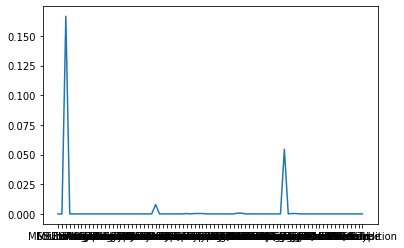

In [200]:
plt.plot(nanDistribute.index, nanDistribute.values)

In [205]:
nanColumns = nanDistribute.index[nanDistribute.values > 0] #包含Nan的列
nanColumns

Index(['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt',
       'GarageCars', 'GarageArea'],
      dtype='object')

In [206]:
svd_all_features[nanColumns].dtypes

LotFrontage     float64
MasVnrArea      float64
BsmtFinSF1      float64
BsmtFinSF2      float64
BsmtUnfSF       float64
TotalBsmtSF     float64
BsmtFullBath    float64
BsmtHalfBath    float64
GarageYrBlt     float64
GarageCars      float64
GarageArea      float64
dtype: object

In [212]:
svd_all_features[nanColums].describe()

,LotFrontage,MasVnrArea,GarageYrBlt
count,2.433000e+03,2.896000e+03,2.760000e+03
mean,7.009053e-17,5.397769e-17,-2.445709e-17
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.069222e+00,-5.698929e-01,-3.249882e+00
25%,-4.414580e-01,-5.698929e-01,-7.082664e-01
50%,-5.593492e-02,-5.698929e-01,3.466741e-02
75%,4.580959e-01,3.446006e-01,9.340083e-01
max,1.043886e+01,8.351994e+00,8.949873e+00


In [213]:
for nanColumn in nanColumns:
    svd_all_features = svd_all_features.fillna({nanColumn:svd_all_features[nanColumn].mean()})

In [214]:
nanDistribute = svd_all_features.count() #Number of non-NA observations
nanDistribute = nanDistribute.apply(lambda x : (svd_all_features.shape[0] -x) / svd_all_features.shape[0])
nanDistribute

MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
                ... 
MiscVal          0.0
MoSold           0.0
YrSold           0.0
SaleType         0.0
SaleCondition    0.0
Length: 79, dtype: float64

In [215]:
nanDistribute.index[nanDistribute.values > 0]

Index([], dtype='object')

# 3.3 SVD主成分分析

In [216]:
svd_train_features = np.array(svd_all_features.values)

In [217]:
U, s , Vh = linalg.svd(svd_train_features)

In [218]:
U.shape

(2919, 2919)

In [235]:
type(s)

numpy.ndarray

In [220]:
Vh.shape

(79, 79)

(array([ 2.,  4.,  6., 10., 12., 16., 14.,  6.,  3.,  2.,  1.,  0.,  2.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([2.19787794e-14, 8.70182886e+00, 1.74036577e+01, 2.61054866e+01,
        3.48073155e+01, 4.35091443e+01, 5.22109732e+01, 6.09128020e+01,
        6.96146309e+01, 7.83164598e+01, 8.70182886e+01, 9.57201175e+01,
        1.04421946e+02, 1.13123775e+02, 1.21825604e+02, 1.30527433e+02,
        1.39229262e+02, 1.47931091e+02, 1.56632920e+02, 1.65334748e+02,
        1.74036577e+02]),
 <BarContainer object of 20 artists>)

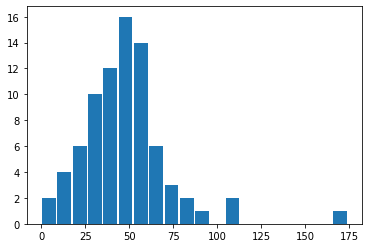

In [221]:
plt.hist(s, rwidth=0.9, bins=20)

In [238]:
# 计算前N个特征值对应的主分成贡献率
contributions = []
c = 0
sumc = pd.array(s).sum()
for i in range(0,79):
    c = c + s[i]
    contributions.append(c/sumc)

In [252]:
# 通过观察主分成贡献率，我选择在79个特征里选择前60个特征

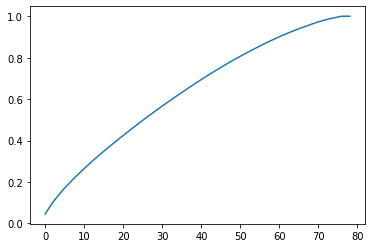

In [240]:
plt.plot(range(0,79), contributions)

In [243]:
compressed_feature_num = 60

In [244]:
U_c = U[:,:compressed_feature_num]
s_c = s[:compressed_feature_num]
Vh_c = Vh.T[:compressed_feature_num, :]

In [245]:
U_c.shape

(2919, 60)

In [246]:
s_c.shape

(60,)

In [247]:
Vh_c.shape

(60, 79)

In [248]:
U_xs_ = np.dot(U_c, np.diag(s_c))
U_xs_.shape

(2919, 60)

In [249]:
U_xs_xVh_ = np.dot(U_xs_, Vh_c)
U_xs_xVh_.shape

(2919, 79)

In [250]:
lower_all_features = DataFrame(U_xs_xVh_)
lower_all_features.shape

(2919, 79)

In [251]:
n_train = train_data.shape[0]
n_features = train_data.shape[1]
train_features = np.array(lower_all_features[:n_train].values)
test_features = np.array(lower_all_features[n_train:].values)
train_labels = np.array(train_data.SalePrice.values).reshape((-1, 1))